In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import tensorflow as tf 
tf.test.gpu_device_name() 

'/device:GPU:0'

In [4]:
import os
import string
from matplotlib import pyplot as plt
from math import floor
import seaborn as sns
import pandas as pd
import numpy as np
import random
from scipy import ndarray      # n-dimensional Array
import skimage as sk           # used for image Processing
from skimage import transform
from skimage import util
import warnings
import keras
warnings.filterwarnings('ignore')  # remove the warnings
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from keras.regularizers import l2 # for model
from keras.layers import Input,Conv2D,Dense, Dropout, BatchNormalization, MaxPooling2D, Activation, Flatten, AvgPool2D,InputLayer,GlobalAveragePooling2D,LSTM,Embedding,Conv2DTranspose,Reshape
from keras.layers import  BatchNormalization as btn
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Model, Sequential
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras.callbacks import LearningRateScheduler,EarlyStopping   
from IPython.display import HTML
import base64
from keras.optimizers import RMSprop
from imblearn.over_sampling import SMOTE
from scipy.ndimage.interpolation import shift
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import cifar10
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import cv2 as cv
import keras.utils as kp
import math
import librosa as lb
import glob
import IPython.display as ipd
from google.colab.patches import cv2_imshow
from PIL import Image,ImageDraw                              
import random
from random import seed

%matplotlib inline


# np.random.seed(100)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [5]:
%cd /content/drive/My\ Drive/HackerEarth Deep Learning/

/content/drive/My Drive/HackerEarth Deep Learning


In [0]:
X = np.load('train_data.npy',allow_pickle=True)
y = np.load('train_label_data.npy',allow_pickle=True)
X_test = np.load('test_data.npy',allow_pickle=True)

In [7]:
print('Shape of train data: ',X.shape)
print('Shape of train label_data:  ',y.shape)
print('Shape of test data:  ',X_test.shape)

Shape of train data:  (5983, 64, 64, 3)
Shape of train label_data:   (5983, 4)
Shape of test data:   (3219, 64, 64, 3)


In [0]:
X_normalize = X/255.0
X_test_normalize = X_test/255.0

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_normalize,y,test_size=0.1,random_state=0)

In [10]:
print('Shape of X_train:  ',X_train.shape)
print('Shape of X_val:  ',X_val.shape)
print('Shape of y_train:  ',y_train.shape)
print('Shape of y_val:  ',y_val.shape)

Shape of X_train:   (5384, 64, 64, 3)
Shape of X_val:   (599, 64, 64, 3)
Shape of y_train:   (5384, 4)
Shape of y_val:   (599, 4)


In [0]:
train_data_gen = ImageDataGenerator(fill_mode='nearest',
                                    horizontal_flip=True,
                                    rotation_range=20,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    )

valid_data_gen = ImageDataGenerator(fill_mode='nearest',
                                    horizontal_flip=True,
                                    rotation_range=20,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    )

In [12]:
type(train_data_gen)

keras.preprocessing.image.ImageDataGenerator

In [13]:
ls = []
for i in range(y_val.shape[0]):
  ls.append(np.argmax(y_val[i]))

sr = pd.Series(data=ls)
# sr.shape
sr.value_counts()

0    223
1    172
2    137
3     67
dtype: int64

#**MODEL**

In [0]:
model = Sequential()


model.add(Conv2D(filters=32,kernel_size=3,strides=1,activation='relu',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01),input_shape=(64,64,3)))
model.add(BatchNormalization())


model.add(Conv2D(filters=64,kernel_size=3,strides=1,activation='relu'))
model.add(BatchNormalization())


model.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters=256,kernel_size=3,strides=1,activation='relu',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.35))


model.add(Conv2D(filters=256,kernel_size=3,strides=1,activation='relu',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model.add(BatchNormalization())


model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))


model.add(Conv2D(filters=512,kernel_size=5,activation='relu',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model.add(BatchNormalization())
# model.add(Dropout(0.4))


# model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.4))


model.add(Flatten())                                    #  also try GlobalAveragePooling2D

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.45))

model.add(Dense(4,activation='softmax'))



optimizer = Adam(lr=0.002)




model.compile(optimizer=optimizer, metrics=['accuracy'], loss='categorical_crossentropy')




In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 60, 60, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
batch_normalization_3 (Batch (None, 60, 60, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)      

In [0]:
model2 = Sequential()

model2.add(Conv2D(filters=64,kernel_size=3,strides=1,activation='relu',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01),input_shape=(64,64,3)))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=64,kernel_size=3,strides=1,activation='relu',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.3))


model2.add(Conv2D(filters=256,kernel_size=3,strides=1,activation='relu',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=256,kernel_size=3,strides=1,activation='relu',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model2.add(BatchNormalization())


model2.add(Conv2D(filters=1024,kernel_size=3,padding='same',activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.35))

model2.add(Flatten())                                    #  also try GlobalAveragePooling2D

model2.add(Dense(1024,activation='relu'))
model2.add(Dropout(0.35))

model2.add(Dense(4,activation='softmax'))



optimizer = Adam(lr=0.002)




model2.compile(optimizer=optimizer, metrics=['accuracy'], loss='categorical_crossentropy')


In [16]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
history = model.fit_generator(train_data_gen.flow(X_train,y_train,batch_size=64),
                              epochs=200 , steps_per_epoch=X_train.shape[0]//64 , validation_data=valid_data_gen.flow(X_val,y_val),callbacks=[annealer])

Epoch 1/200
84/84 [==============================] - 17s 198ms/step - loss: 25.1190 - accuracy: 0.3436 - val_loss: 39.7399 - val_accuracy: 0.1886
Epoch 2/200
84/84 [==============================] - 12s 148ms/step - loss: 21.5464 - accuracy: 0.3406 - val_loss: 17.8221 - val_accuracy: 0.2988
Epoch 3/200
84/84 [==============================] - 12s 148ms/step - loss: 14.5391 - accuracy: 0.3786 - val_loss: 12.3473 - val_accuracy: 0.3990
Epoch 4/200
84/84 [==============================] - 12s 148ms/step - loss: 11.3196 - accuracy: 0.4508 - val_loss: 10.3483 - val_accuracy: 0.4157
Epoch 5/200
84/84 [==============================] - 12s 148ms/step - loss: 9.2070 - accuracy: 0.4838 - val_loss: 8.2876 - val_accuracy: 0.3990
Epoch 6/200
84/84 [==============================] - 12s 148ms/step - loss: 7.5479 - accuracy: 0.5002 - val_loss: 6.8109 - val_accuracy: 0.4674
Epoch 7/200
84/84 [==============================] - 12s 147ms/step - loss: 6.2381 - accuracy: 0.5237 - val_loss: 5.8220 - val_a

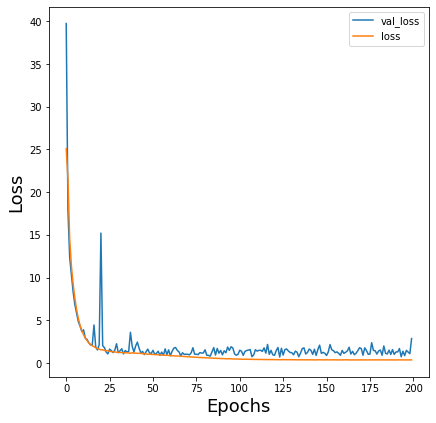

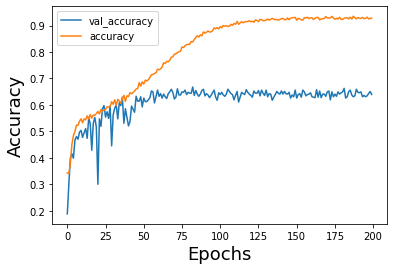

In [17]:
name_title = ['Loss','Accuracy']
# for net in range(nets):
fig=plt.figure(figsize=(64,64))
for i in range(0,2):
    ax=fig.add_subplot(8,8,i+1)
    plt.plot(history.history[list(history.history.keys())[i]], label = list(history.history.keys())[i] )
    plt.plot(history.history[list(history.history.keys())[i+2]],label = list(history.history.keys())[i+2] )
    plt.xlabel('Epochs', fontsize=18)
    plt.ylabel(name_title[i], fontsize=18)
    plt.legend()
    plt.show()


In [0]:
model.save('model1.h5')

In [19]:
output = model.predict_proba(X_test_normalize)
print(output.shape)

(3219, 4)


In [0]:
output_1=[]
for y in range(X_test_normalize.shape[0]):
  output_1.append(np.argmax(output[y]))

In [22]:
len(output_1)      # same as length of X_test_normalize.

3219

In [0]:
out_name=[]
for x in output_1:
  if x==0:
    out_name.append('Food')
  elif x==1:
    out_name.append('Attire')
  elif x==2:
    out_name.append('misc')
  else:
    out_name.append('Decorationandsignage')    

In [24]:
len(out_name)

3219

In [0]:
output_frame = pd.DataFrame(out_name,columns=['Class'])

In [26]:
print(output_frame.shape)
output_frame.head()

(3219, 1)


,Class
0,Food
1,misc
2,Food
3,Food
4,Attire


In [0]:
test_df = pd.read_csv('/content/drive/My Drive/HackerEarth Deep Learning/dataset/test.csv')

In [28]:
test_df.head()

,Image
0,image6245.jpg
1,image10409.jpg
2,image8692.jpg
3,image10517.jpg
4,image2580.jpg


In [0]:
combine = pd.concat([test_df,output_frame],axis=1)

In [30]:
combine.head()

,Image,Class
0,image6245.jpg,Food
1,image10409.jpg,misc
2,image8692.jpg,Food
3,image10517.jpg,Food
4,image2580.jpg,Attire


In [31]:
combine.shape

(3219, 2)

In [0]:
combine.to_csv('submission.csv')